In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
cancer  = pd.read_csv("cleaned_data.csv")

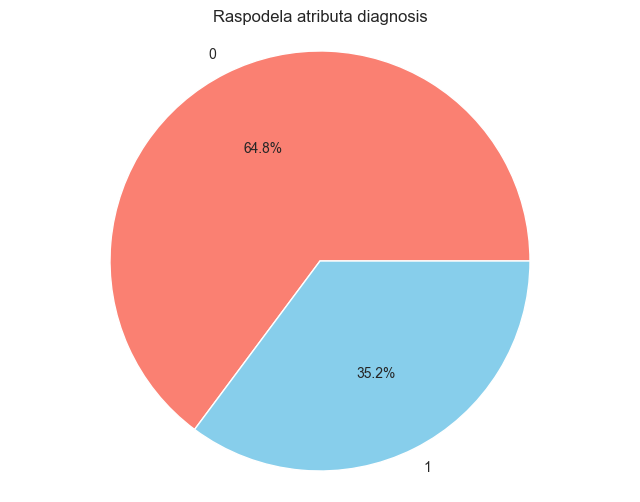

In [6]:
# Brojanje vrednosti u koloni 'diagnosis'
diagnosis_counts = cancer['diagnosis'].value_counts()

# Plotovanje pita grafikona
plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', colors=['salmon', 'skyblue'])
plt.title('Raspodela atributa diagnosis')
plt.axis('equal')  # Da pita grafikon bude kružnog oblika
plt.show()

Uocavamo da je skup podataka nebalansiran

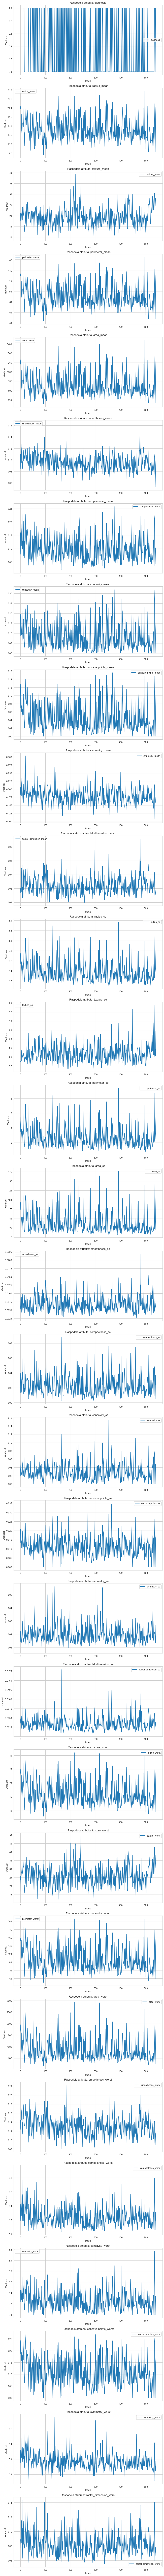

In [34]:
num_columns = len(cancer.columns)

# Postavljanje figure i veličine za subplote
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 5 * num_columns))

# Ako postoji samo jedna kolona, 'axes' nije lista, pa je potrebno konvertovati
if num_columns == 1:
    axes = [axes]

# Iteriranje kroz kolone DataFrame-a
for i, column in enumerate(cancer.columns):
    # Prikazivanje linijskog grafikona za svaku kolonu
    axes[i].plot(cancer.index, cancer[column], label=column)
    axes[i].set_title(f'Raspodela atributa: {column}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Vrednost')
    axes[i].legend()

# Automatsko prilagođavanje rasporeda
plt.tight_layout()

# Prikazivanje grafikona
plt.show()

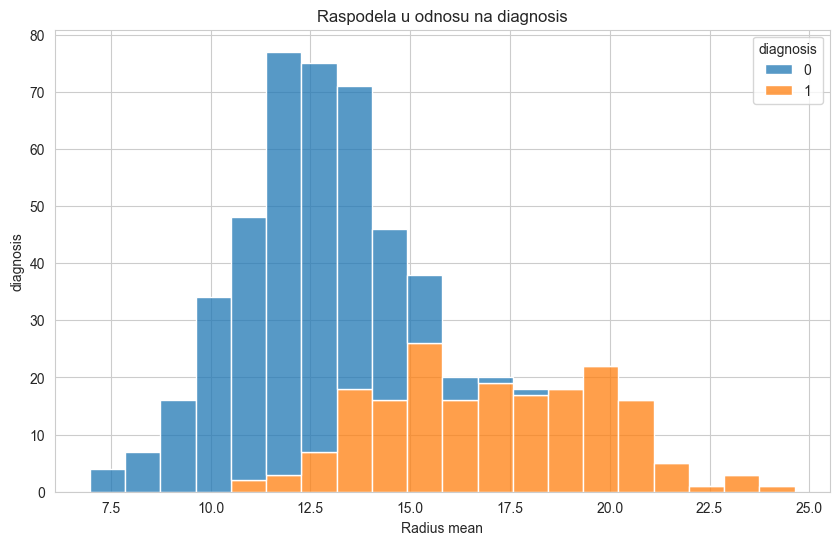

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(data=cancer, x='radius_mean',hue='diagnosis',multiple="stack",palette="tab10")
plt.title('Raspodela u odnosu na diagnosis')
plt.xlabel('Radius mean')
plt.ylabel('diagnosis')
plt.show()

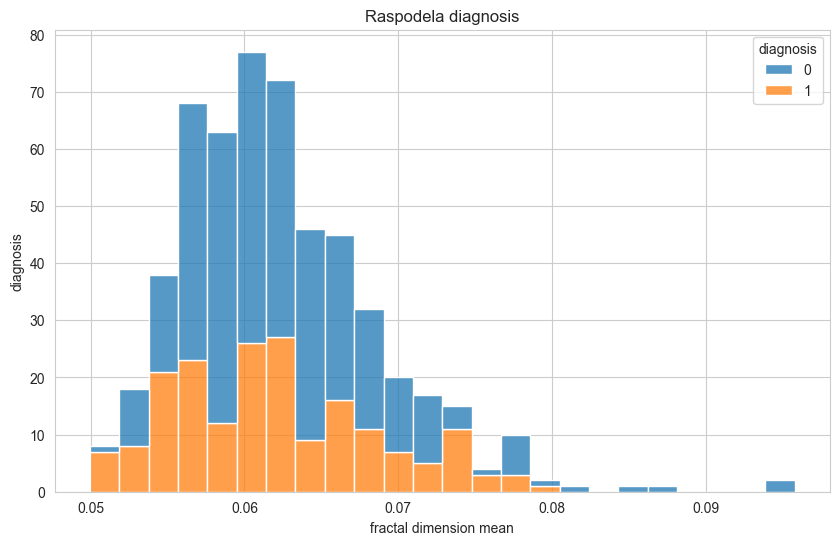

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(data=cancer, x='fractal_dimension_mean',hue='diagnosis',multiple="stack",palette="tab10")
plt.title('Raspodela diagnosis')
plt.xlabel('fractal dimension mean')
plt.ylabel('diagnosis')
plt.show()

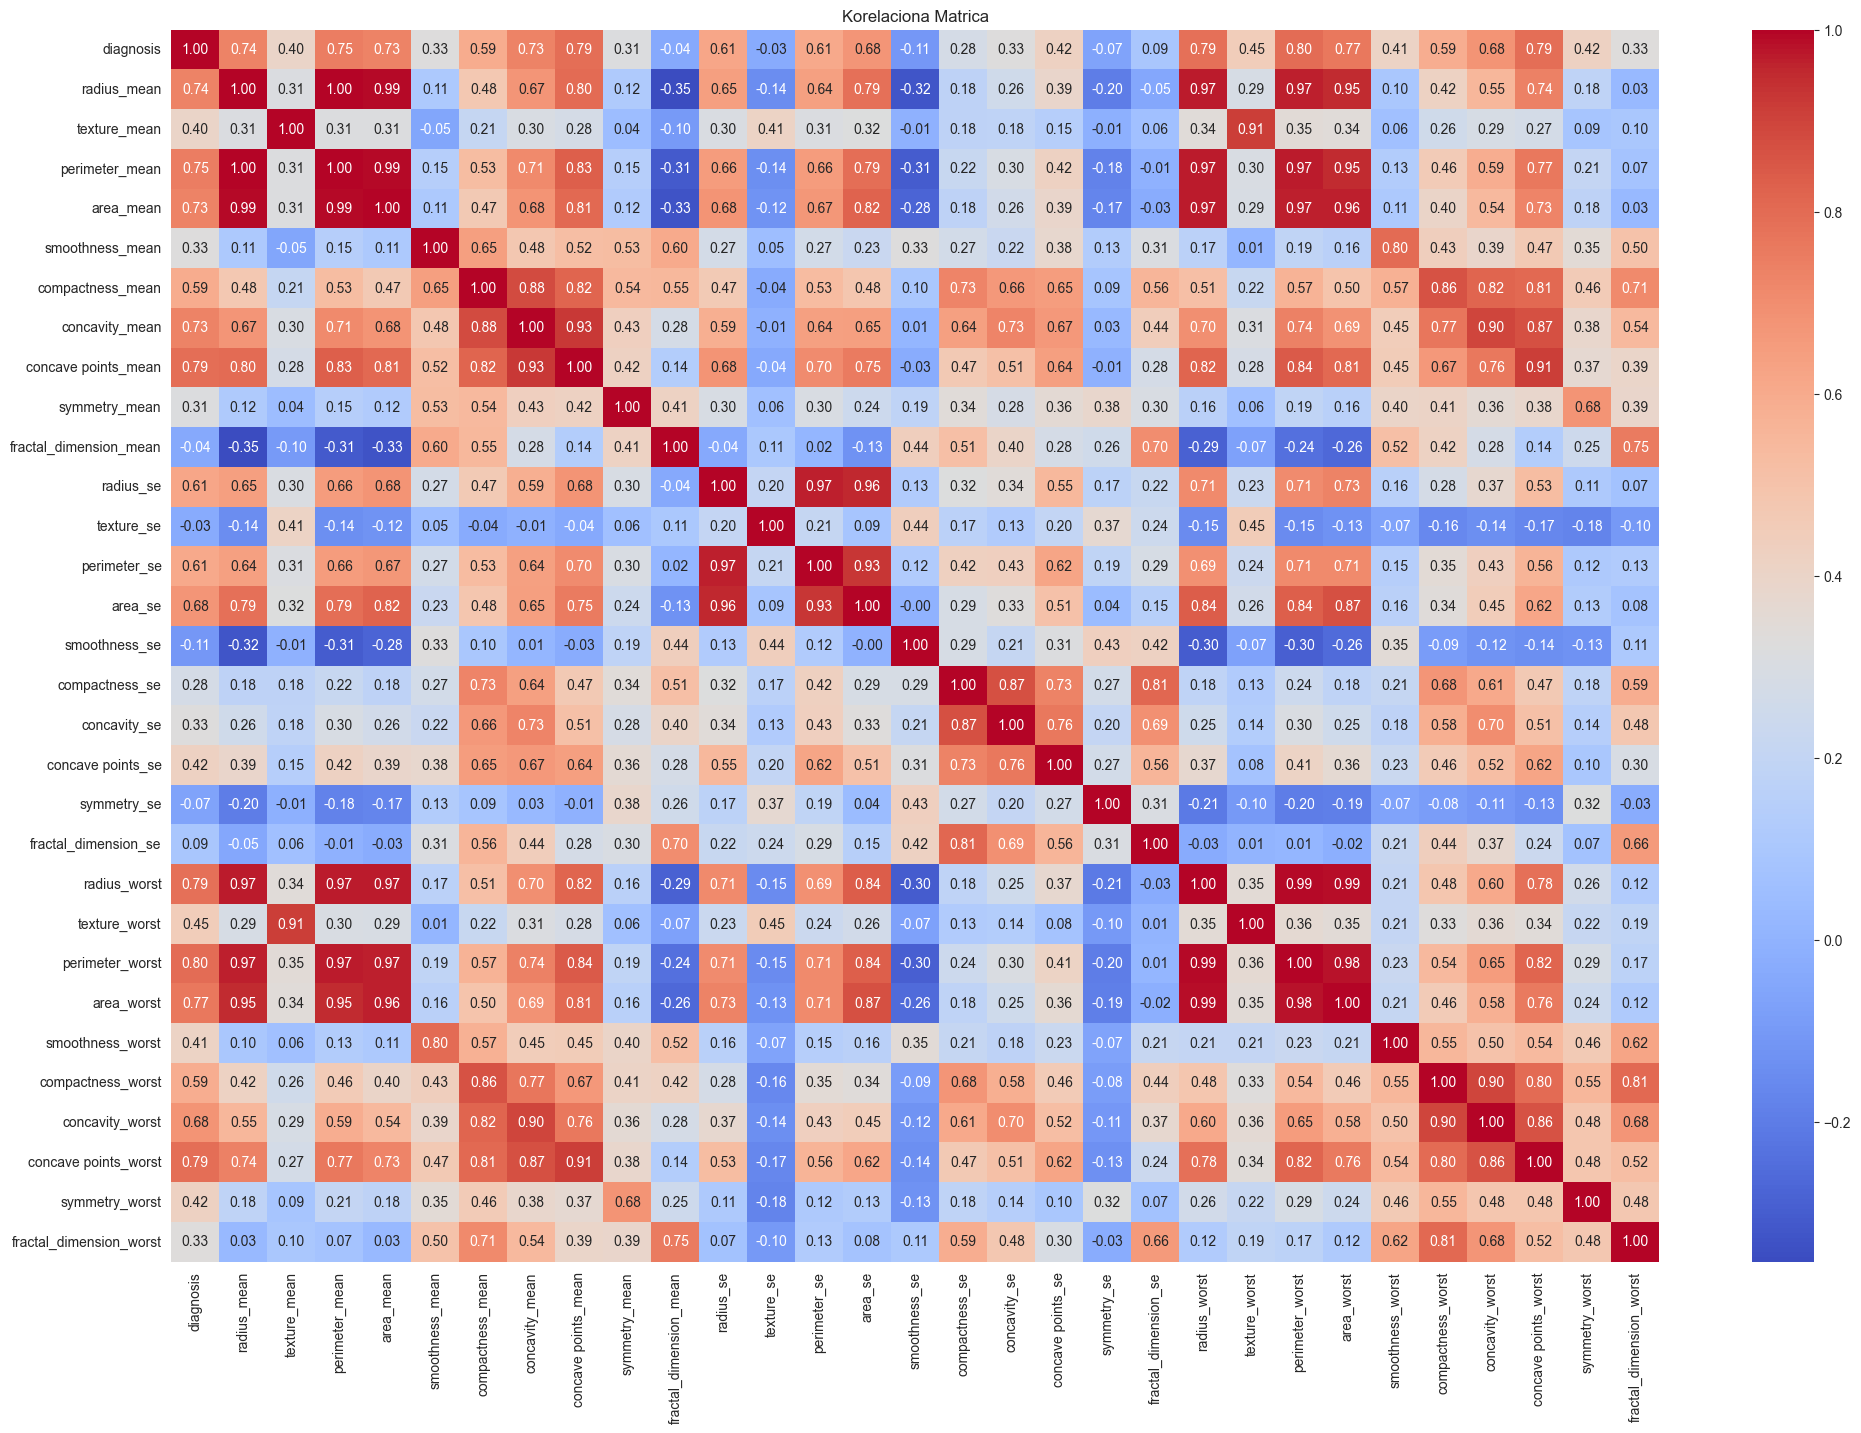

In [9]:
corr = cancer.corr()

plt.figure(figsize=(24, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelaciona Matrica')
plt.show()

In [24]:

## Kreiranje korelacione matrice
correlation_matrix = cancer.select_dtypes(include=['number']).corr()

# Pronalaženje kolona sa korelacijom većom od 0.8
high_correlation_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_correlation_cols.add(correlation_matrix.columns[i])
            

# Uklanjanje identifikovanih kolona sa visokom korelacijom
cancer_filtered = cancer.drop(high_correlation_cols, axis=1)

# Ispisivanje prvih nekoliko redova kako biste proverili rezultat
print(cancer_filtered.head())

   diagnosis  symmetry_mean  fractal_dimension_mean  texture_se  \
0          1         0.1812                 0.05667      0.7339   
1          1         0.2069                 0.05999      0.7869   
2          1         0.1809                 0.05883      0.7813   
3          1         0.2087                 0.07613      0.8902   
4          1         0.1794                 0.05742      0.7732   

   smoothness_se  concavity_se  concave points_se  symmetry_se  \
0       0.005225       0.01860            0.01340      0.01389   
1       0.006150       0.03832            0.02058      0.02250   
2       0.011490       0.05688            0.01885      0.01756   
3       0.007510       0.03672            0.01137      0.02165   
4       0.004314       0.02254            0.01039      0.01369   

   fractal_dimension_se  texture_worst  area_worst  smoothness_worst  \
0              0.003532          23.41      1956.0            0.1238   
1              0.004571          25.53      1709.0      

In [25]:
cancer_filtered.shape

(540, 15)

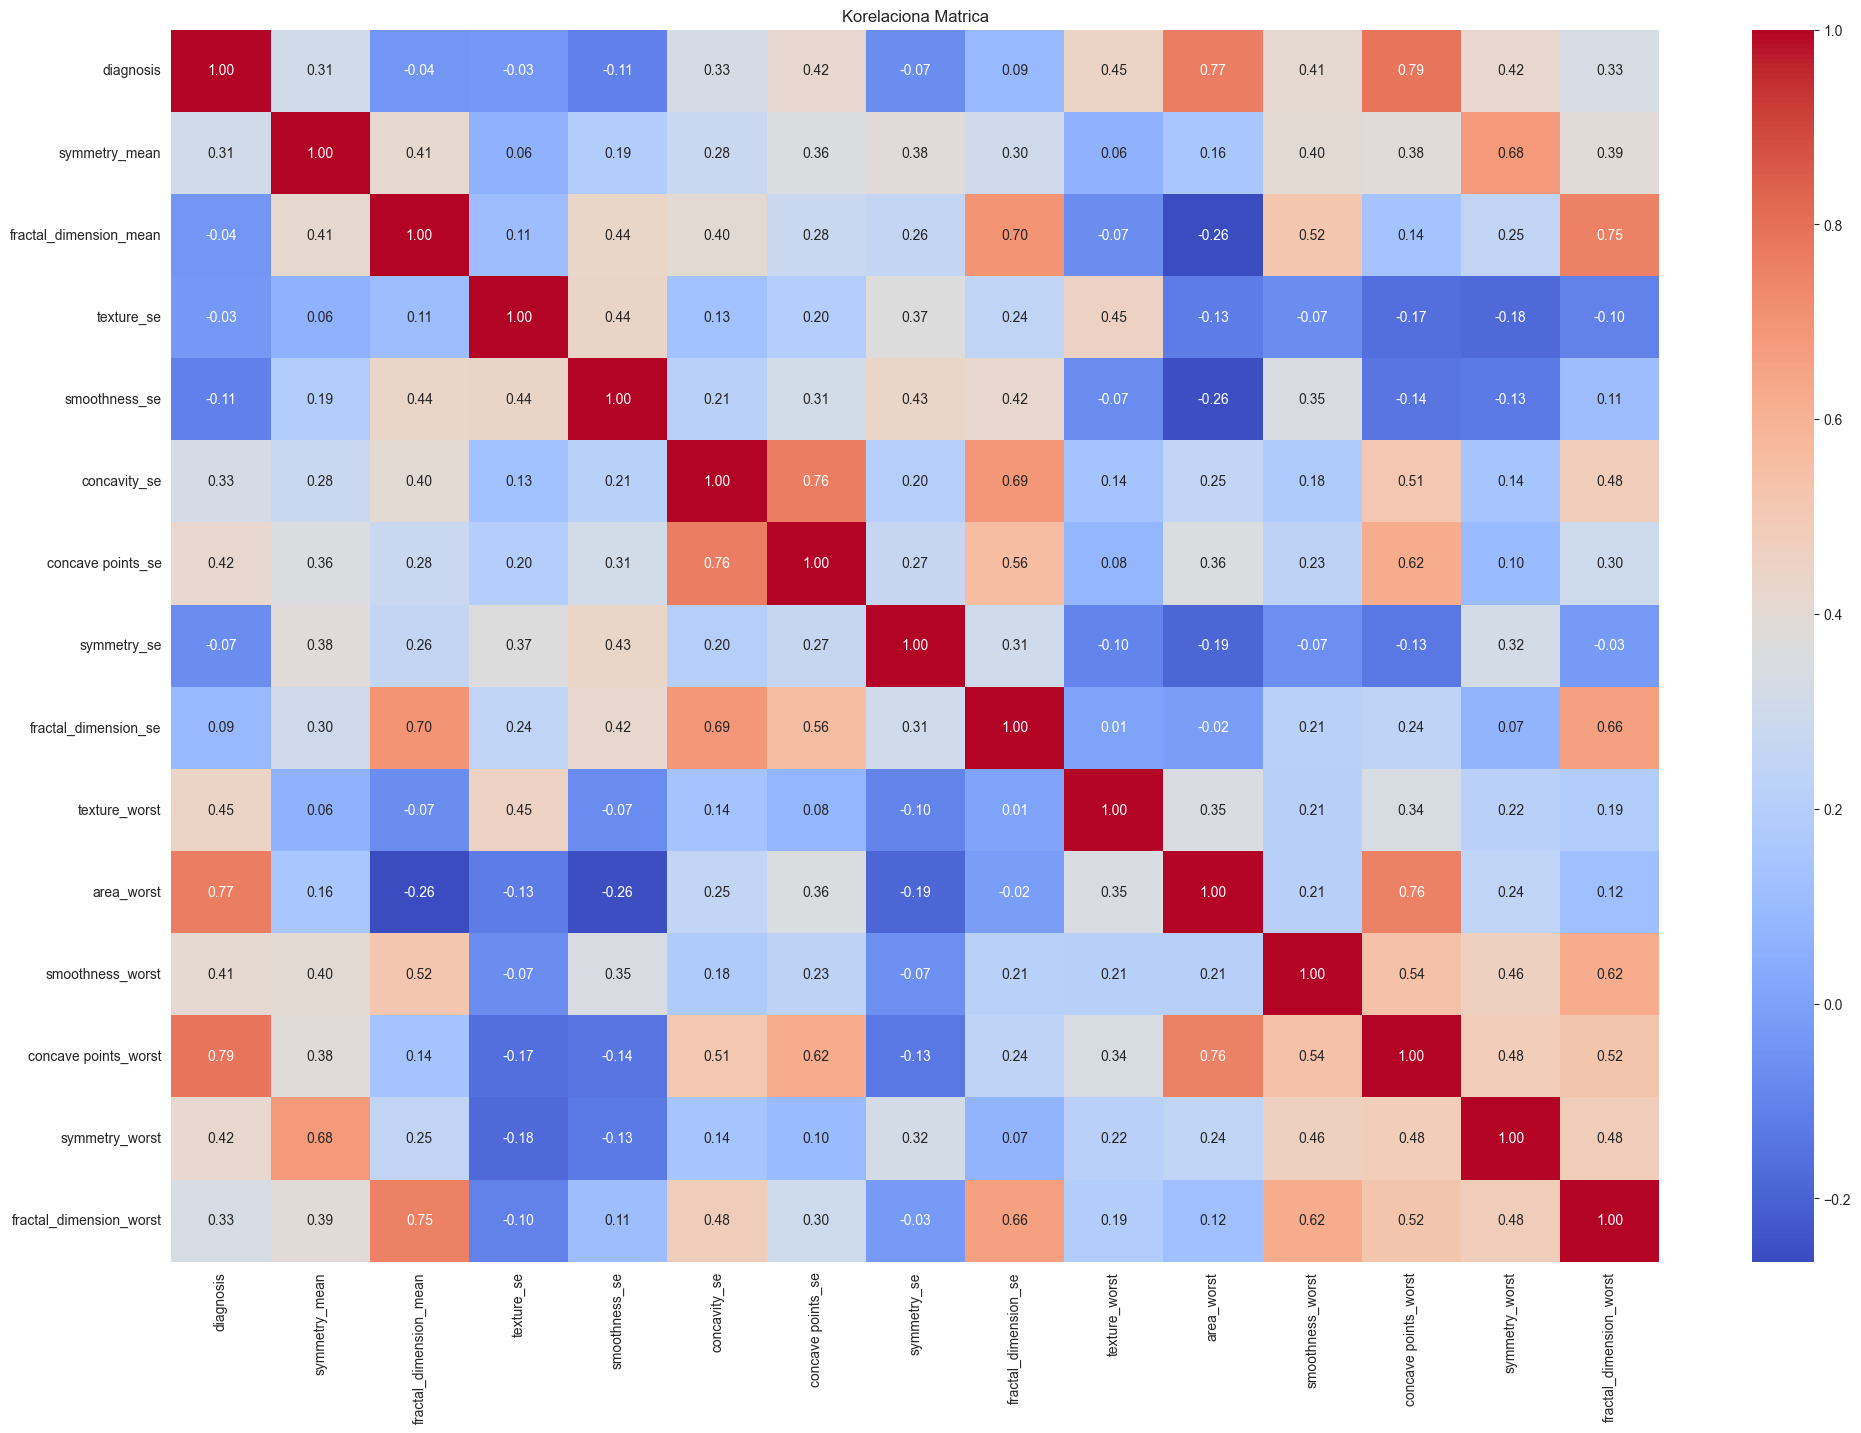

In [26]:
corr = cancer_filtered.corr()

plt.figure(figsize=(24, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelaciona Matrica')
plt.show()

In [29]:
cancer_filtered.to_csv("filtered_data.csv")

Optimalan broj atributa: 16


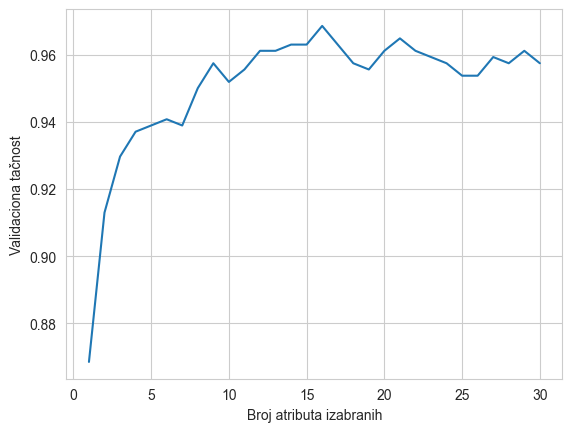

In [31]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
rfecv = RFECV(estimator=RandomForestClassifier(), cv=5)
x = cancer.drop(['diagnosis'],axis = 1)
y = cancer['diagnosis']
# Primeni RFECV na podatke
rfecv.fit(x, y)

# Prikazivanje rezultata
print("Optimalan broj atributa: %d" % rfecv.n_features_)

# Prikazivanje grafika koji prikazuje važnost atributa
plt.figure()
plt.xlabel("Broj atributa izabranih")
plt.ylabel("Validaciona tačnost")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

Svakako sam svojom metodom eliminicaije korelacija na osnovu matrice dobio isti broj atributa tako da ce sve biti testirano na jednom datasetu.